# Naive-Bayes: 
It solves classifier problems with the help of probablity.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [12]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
x=df.drop(columns=["species"],axis=1)
y=df['species']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [26]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [27]:
y_pred=nb.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9777777777777777


# K-Nearest Neighbour(KNN):
It works on both regression and classfication problem.

It doesnot work with large dataset and imbalanced dataset.

In [30]:
df=pd.read_csv("C:\\Users\\user\\Datasets\\knn_data.csv")

In [31]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [34]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [40]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
x=df.drop(columns=["TARGET CLASS"],axis=1)
y=df['TARGET CLASS']

<Axes: ylabel='Count'>

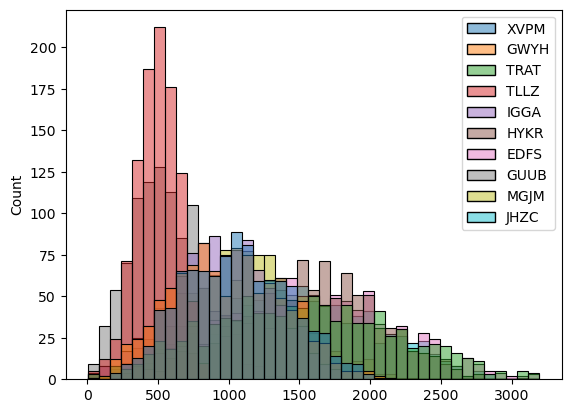

In [58]:
sns.histplot(x)

<Axes: ylabel='Count'>

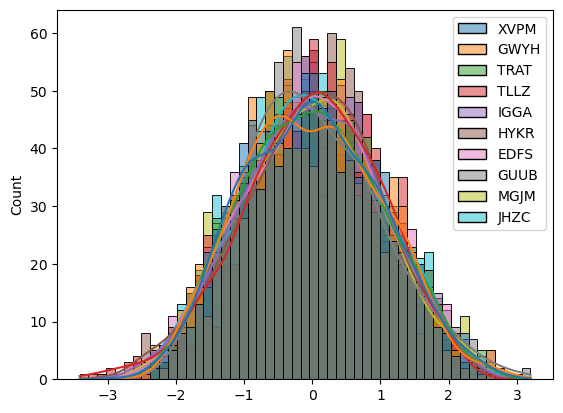

In [60]:
sc_x=sc.fit_transform(x)
x_sc=pd.DataFrame(sc_x,columns=x.columns)
import seaborn as sns
sns.histplot(x_sc, kde=True)

    

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=42)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
y_pred=knn.predict(x_test)

In [120]:
from sklearn.metrics import confusion_matrix,classification_report

In [121]:
print(confusion_matrix(y_test,y_pred))

[[115  31]
 [ 36 118]]


In [122]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       146
           1       0.79      0.77      0.78       154

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



In [123]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.7766666666666666


In [124]:
err=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    err.append(np.mean(y_test!=y_pred))
err

[0.27666666666666667,
 0.27,
 0.22333333333333333,
 0.23333333333333334,
 0.22,
 0.2,
 0.19,
 0.18666666666666668,
 0.17666666666666667,
 0.19,
 0.18333333333333332,
 0.18333333333333332,
 0.17,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.17,
 0.16333333333333333,
 0.16666666666666666,
 0.15666666666666668,
 0.16333333333333333,
 0.17,
 0.16666666666666666,
 0.17,
 0.16333333333333333,
 0.16,
 0.16,
 0.16,
 0.16,
 0.15666666666666668,
 0.16,
 0.16,
 0.16333333333333333,
 0.17,
 0.16666666666666666,
 0.17,
 0.17666666666666667,
 0.16666666666666666]

In [125]:
import matplotlib.pyplot as plt

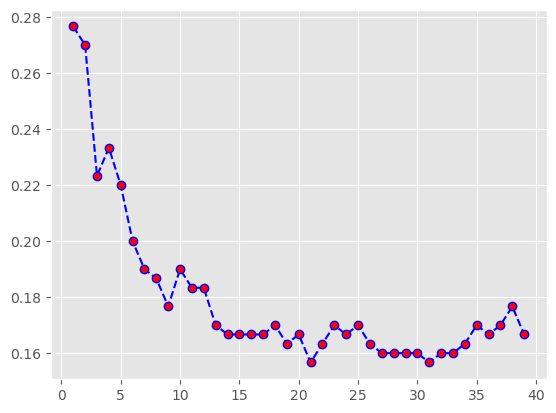

In [126]:

plt.plot(range(1,40),err,linestyle='dashed',color='blue',marker='o',markerfacecolor='red')


In [127]:
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [128]:
print(confusion_matrix(y_test,y_pred))

[[125  21]
 [ 26 128]]


In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.86      0.83      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [130]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.8433333333333334


# Decision Tree:
    
It works on both classification and regression.

It works with entropy and gini impurity(index).

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
import seaborn as sns

In [141]:
df=sns.load_dataset("iris")

In [142]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [157]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['species']=lb.fit_transform(df['species'])
x=df.drop(columns=["species"],axis=1)
y=df['species']

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
dc=DecisionTreeClassifier() #post-pruning if we set max_depth

In [174]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

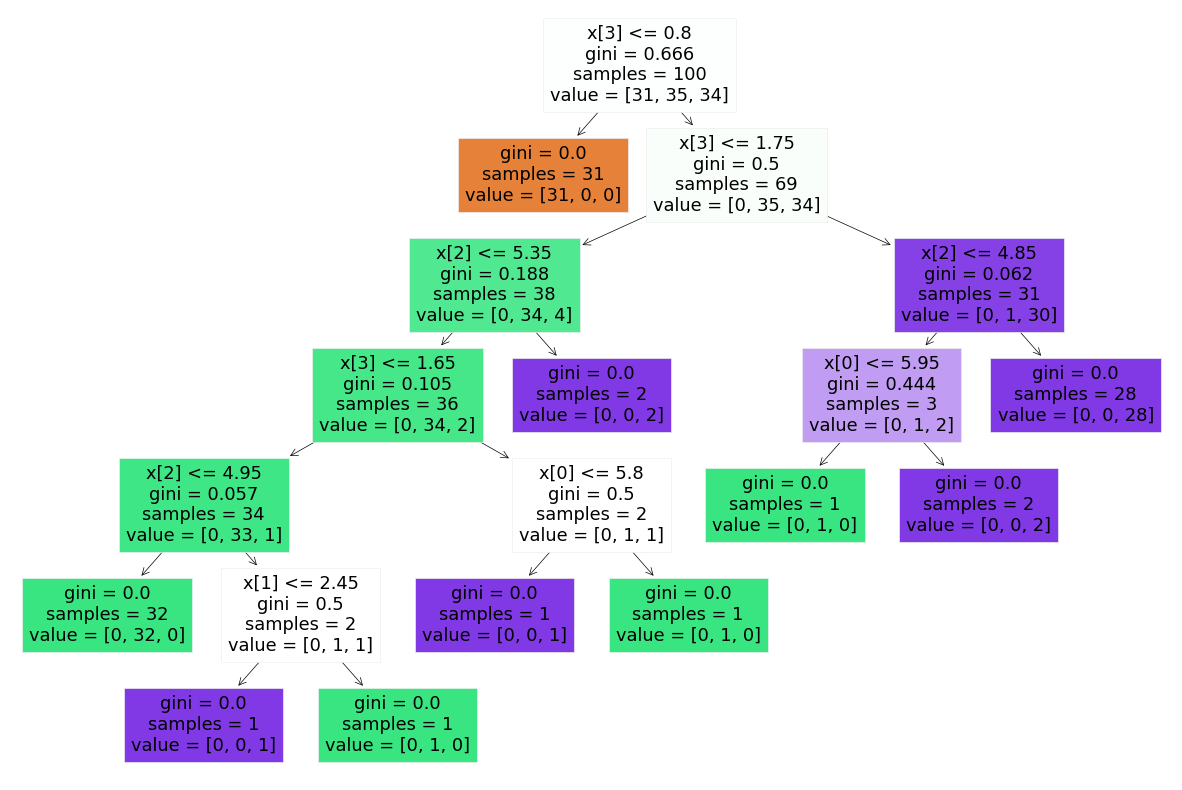

In [175]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dc,filled=True)

In [176]:
y_pred=dc.predict(x_test)

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.98


In [179]:
#pre-prunning
parameter={
    'criterion':['gini','entropy','loss_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
treemodel=DecisionTreeClassifier()
gd=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [182]:
gd.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'loss_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [183]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [185]:
y_pred=gd.predict(x_test)

In [186]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.96
